In [21]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)


Toggle code

In [22]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
import pylab as pl

# setting parameters for default matplotlib plots
%matplotlib inline

In [23]:
pl.style.use('fabiostyle')

# needs to find the library of functions
sys.path.append('../../../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [24]:
NOTEBOOK_NAME = 'similarity_JSB'

In [25]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

In [26]:
for session in '3odor_pre', '3odor_post', '3odor_pre_rev', '3odor_post_rev':
    exec('vars_%s = {}'%session)
    folder = '../%s/notebooks/autorestore/preprocessing/'%session
    for var in ('time_ax', 'events', 'cycles', 'CYCLE_START', 'CS_DURATION', 'DELAY',
                'is_rewardt', 'is_CSmt', 'is_sht'):
        eval('vars_%s'%session).update({var:ut.load_variable(var, folder=folder)})
    eval('vars_%s'%session).update({'selectivity':ut.load_variable('selectivity',
                                    '../%s/notebooks/autorestore/selectivity_intrasession_JSB/'%session)})

In [27]:
sessions = '3odor_pre', '3odor_post', '3odor_pre_rev', '3odor_post_rev'
for session in sessions:
    for k, v in eval('vars_%s'%session).iteritems():
        exec('%s = vars_%s[\'%s\']'%(k, session, k))

    baseline = 4

    for odor in ['rewardt', 'CSmt', 'sht']:
        for csus in ['cs', 'tr', 'cstr', 'us',]:
            tshift = CS_DURATION+DELAY if csus=='us' else CS_DURATION if csus=='tr' else 0
            exec("patterns_%s_%s_%s = np.r_[ut.compute_mean_activity_patterns(time_ax, events, cycles[is_%s],\
                  (-CYCLE_START+%f, -CYCLE_START+CS_DURATION+%f))]"%(odor, session, csus, odor, tshift, tshift))
#     exec("patterns_bs_%s = np.r_[ut.compute_mean_activity_patterns(time_ax, events, cycles,\
#                                  (-CYCLE_START+baseline, -CYCLE_START+CS_DURATION+baseline))]"%session)

In [28]:
from itertools import product

In [29]:
reload(ut)

<module 'utils' from '../../../../code/utils.pyc'>

In [30]:
def scalar_prod(u, v):
    return u.dot(v)/np.sqrt(u.dot(u)*v.dot(v))

odors = 'CSmt', 'rewardt', 'sht'
pattern_ids = ['%s-%s-%s'%(session, odor, csus) for session, odor, csus in product(sessions, odors, ['cs', 'tr', 'cstr', 'us'])]
all_patterns = [eval('patterns_%s_%s_%s'%(odor, session, csus))
                for session, odor, csus in product(sessions, odors, ['cs', 'tr', 'cstr', 'us'])]
corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids, all_patterns)

Cannot compute similarity between 3odor_pre-CSmt-cs and 3odor_post-CSmt-cs.
Cannot compute similarity between 3odor_pre-CSmt-cs and 3odor_post-CSmt-tr.
Cannot compute similarity between 3odor_pre-CSmt-cs and 3odor_post-CSmt-cstr.
Cannot compute similarity between 3odor_pre-CSmt-cs and 3odor_post-CSmt-us.
Cannot compute similarity between 3odor_pre-CSmt-cs and 3odor_post-rewardt-cs.
Cannot compute similarity between 3odor_pre-CSmt-cs and 3odor_post-rewardt-tr.
Cannot compute similarity between 3odor_pre-CSmt-cs and 3odor_post-rewardt-cstr.
Cannot compute similarity between 3odor_pre-CSmt-cs and 3odor_post-rewardt-us.
Cannot compute similarity between 3odor_pre-CSmt-cs and 3odor_post-sht-cs.
Cannot compute similarity between 3odor_pre-CSmt-cs and 3odor_post-sht-tr.
Cannot compute similarity between 3odor_pre-CSmt-cs and 3odor_post-sht-cstr.
Cannot compute similarity between 3odor_pre-CSmt-cs and 3odor_post-sht-us.
Cannot compute similarity between 3odor_pre-CSmt-cs and 3odor_pre_rev-CSmt

In [42]:
pairs_to_plot = [('3odor_pre-CSmt-cs', '3odor_pre-CSmt-cs'),
                 ('3odor_pre-CSmt-tr', '3odor_pre-CSmt-tr'),
                 ('3odor_pre-CSmt-cs', '3odor_pre-rewardt-cs'),
                 ('3odor_pre-rewardt-cs', '3odor_pre-rewardt-cs'),
                 ('3odor_pre-rewardt-tr', '3odor_pre-rewardt-tr'),
                 ('3odor_pre-CSmt-us', '3odor_pre-CSmt-us'),
                 ('3odor_pre-CSmt-us', '3odor_pre-rewardt-us'),
                 ('3odor_pre-rewardt-us', '3odor_pre-rewardt-us'),
                 ('3odor_pre-CSmt-cs', '3odor_pre-CSmt-us'),
                 ('3odor_pre-CSmt-cs', '3odor_pre-rewardt-us'),
                 ('3odor_pre-rewardt-cs', '3odor_pre-rewardt-us'),
                 ('3odor_post-CSmt-cs', '3odor_post-CSmt-cs'),
                 ('3odor_post-CSmt-tr', '3odor_post-CSmt-tr'),
                 ('3odor_post-CSmt-cs', '3odor_post-rewardt-cs'),
                 ('3odor_post-rewardt-tr', '3odor_post-rewardt-tr'),
                 ('3odor_post-rewardt-cs', '3odor_post-rewardt-cs'),
                 ('3odor_post-CSmt-us', '3odor_post-CSmt-us'),
                 ('3odor_post-CSmt-us', '3odor_post-rewardt-us'),
                 ('3odor_post-rewardt-us', '3odor_post-rewardt-us'),
                 ('3odor_post-CSmt-cs', '3odor_post-CSmt-us'),
                 ('3odor_post-CSmt-cs', '3odor_post-rewardt-us'),
                 ('3odor_post-rewardt-cs', '3odor_post-rewardt-us'), 
                 ('3odor_pre-sht-cs', '3odor_pre-sht-cs'),
                 ('3odor_pre-sht-tr', '3odor_pre-sht-tr'),
                 ('3odor_pre-sht-cs', '3odor_pre-rewardt-cs'),
                 ('3odor_pre-sht-us', '3odor_pre-sht-us'),
                 ('3odor_pre-sht-us', '3odor_pre-rewardt-us'),
                 ('3odor_pre-sht-cs', '3odor_pre-sht-us'),
                 ('3odor_pre-sht-cs', '3odor_pre-rewardt-us'),
                 ('3odor_post-sht-cs', '3odor_post-sht-cs'),
                 ('3odor_post-sht-tr', '3odor_post-sht-tr'),
                 ('3odor_post-sht-cs', '3odor_post-rewardt-cs'),
                 ('3odor_post-sht-us', '3odor_post-sht-us'),
                 ('3odor_post-sht-us', '3odor_post-rewardt-us'),
                 ('3odor_post-sht-cs', '3odor_post-sht-us'),
                 ('3odor_post-sht-cs', '3odor_post-rewardt-us'),
                 ('3odor_pre-sht-cs', '3odor_pre-CSmt-cs'),
                 ('3odor_pre-sht-us', '3odor_pre-CSmt-us'),
                 ('3odor_pre-sht-cs', '3odor_pre-CSmt-us'),
                 ('3odor_post-sht-cs', '3odor_post-CSmt-cs'),
                 ('3odor_post-sht-us', '3odor_post-CSmt-us'),
                 ('3odor_post-sht-cs', '3odor_post-CSmt-us'),
                 ]

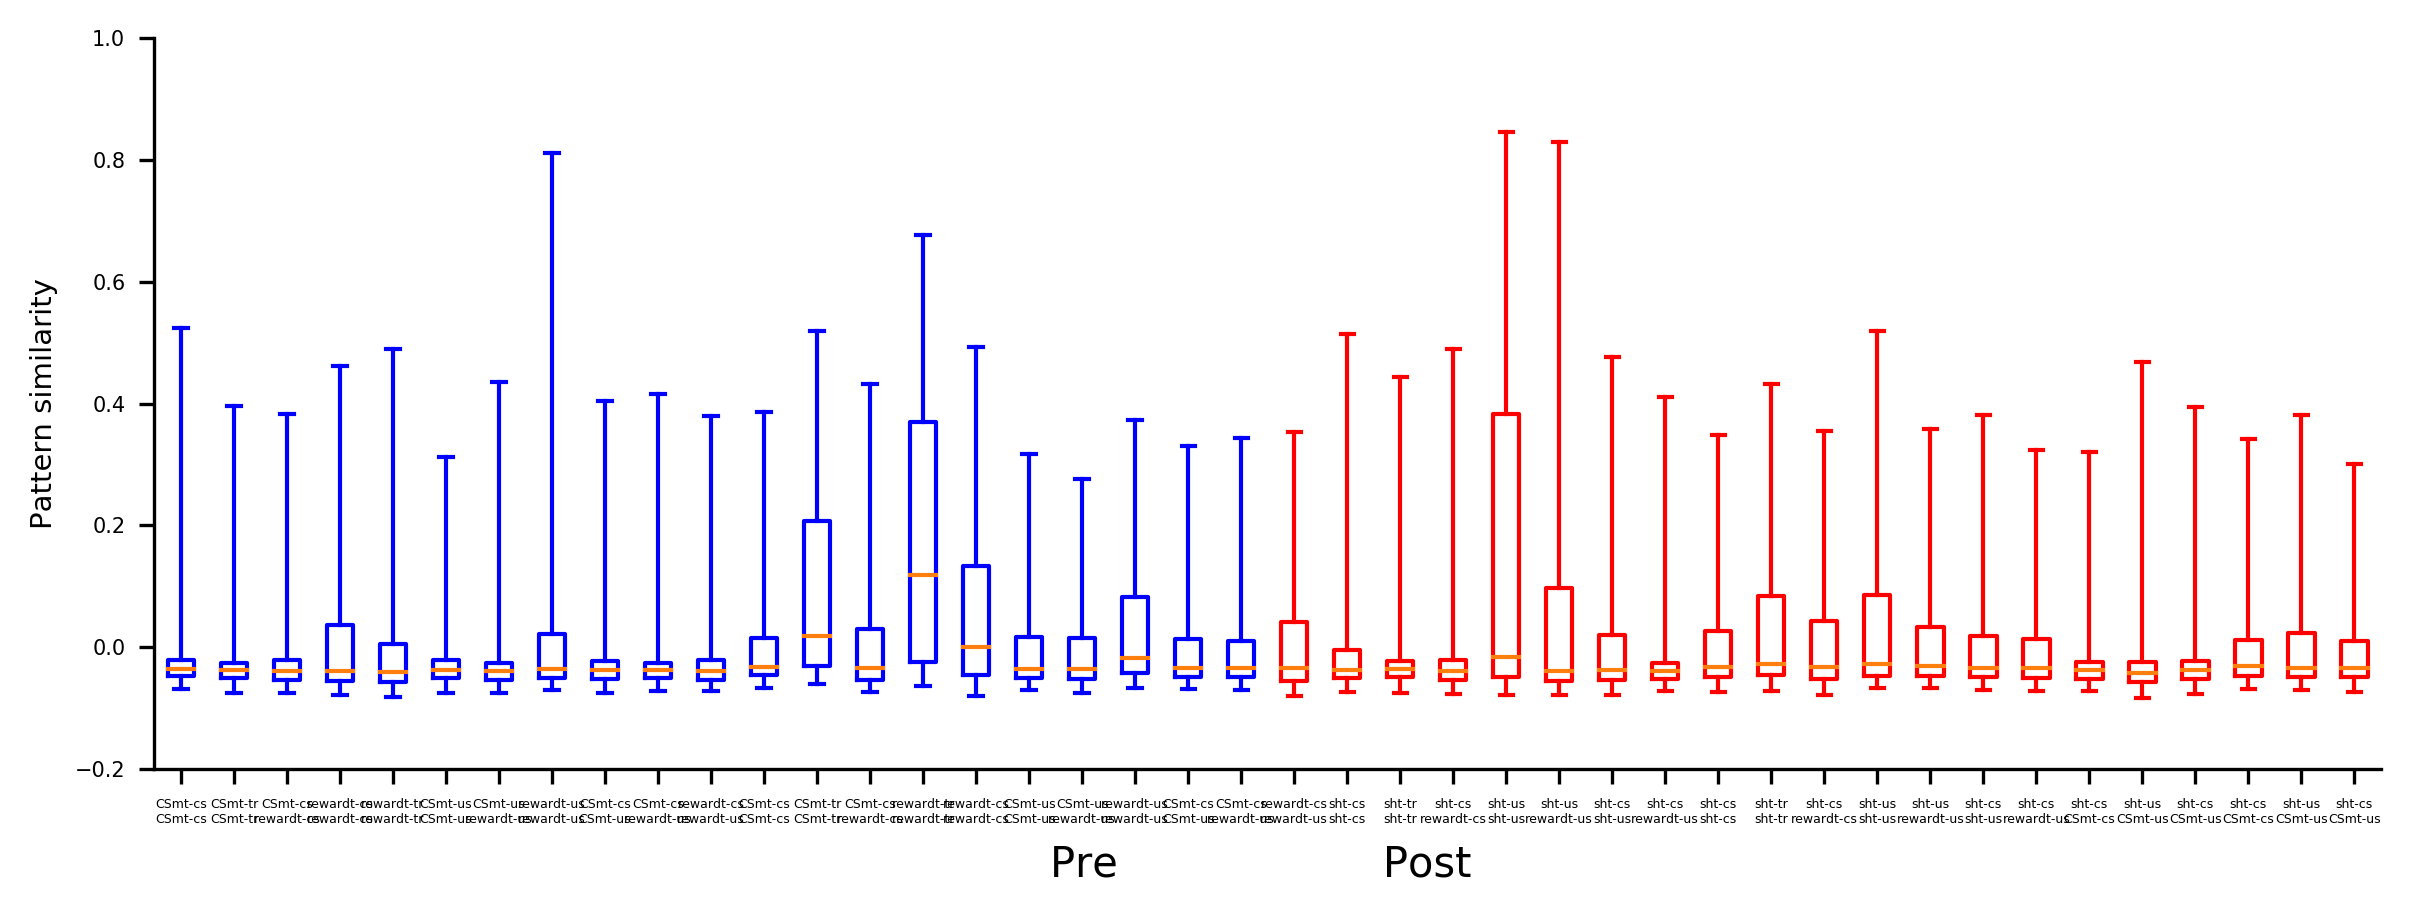

In [43]:
from scipy import stats

fig, ax = pl.subplots(1, 1, figsize=(8, 3))
values = [corrmat_distr[tuple(p)]
          for p in pairs_to_plot]
colors = np.repeat(['b', 'r',], len(values)/2).tolist()
# pt.plot_violins(values, ax=ax, colors=colors)
bp = ax.boxplot(values, whis=[5, 95], showfliers=False, positions=range(len(values)))
[b.set_color(c) for b, c in zip(bp['boxes'], colors)]
[b.set_color(c) for b, c in zip(bp['whiskers'], np.repeat(colors, 2))]
[b.set_color(c) for b, c in zip(bp['caps'], np.repeat(colors, 2))]


ax.set_xticks(range(len(values)))
ax.set_xticklabels(['%s\n%s'%(p[0][p[0].find('-')+1:], p[1][p[1].find('-')+1:]) for p in pairs_to_plot], fontsize=3)
ax.set_xlabel('Pre                    Post ', fontsize=10)
ax.set_ylim(-0.2, 1)
ax.set_ylabel("Pattern similarity")
pt.nicer_plot(ax)

fig.tight_layout()
# pl.savefig("pattern_similarity_prepost_odors_violin.jpg", format="jpg", bbox_inches="tight")

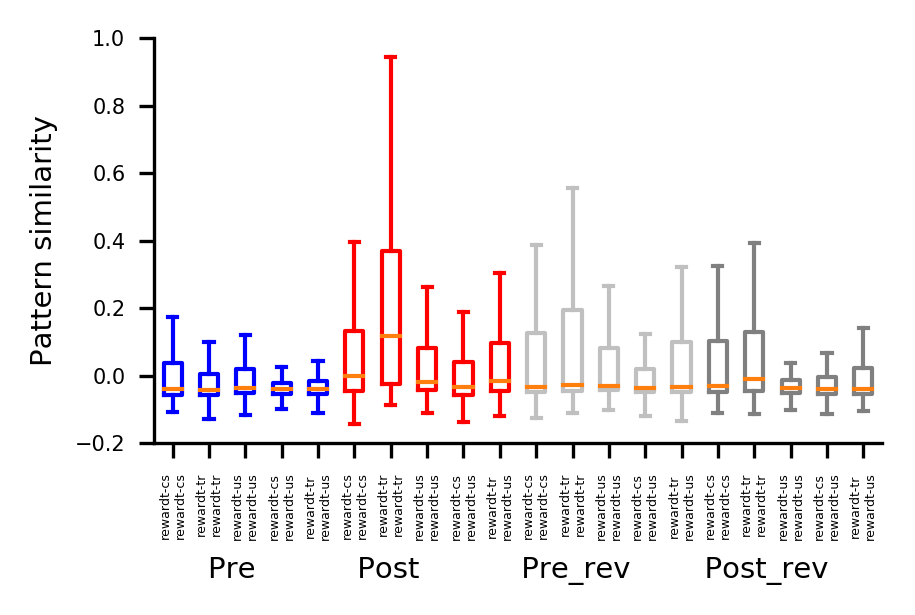

In [39]:
from scipy import stats

pairs_to_plot = pairs_to_plot = [('3odor_pre-rewardt-cs', '3odor_pre-rewardt-cs'),
                 ('3odor_pre-rewardt-tr', '3odor_pre-rewardt-tr'),
                 ('3odor_pre-rewardt-us', '3odor_pre-rewardt-us'),
                 ('3odor_pre-rewardt-cs', '3odor_pre-rewardt-us'),
                 ('3odor_pre-rewardt-tr', '3odor_pre-rewardt-us'),
                 ('3odor_post-rewardt-cs', '3odor_post-rewardt-cs'),
                 ('3odor_post-rewardt-tr', '3odor_post-rewardt-tr'),
                 ('3odor_post-rewardt-us', '3odor_post-rewardt-us'),
                 ('3odor_post-rewardt-cs', '3odor_post-rewardt-us'),
                 ('3odor_post-rewardt-tr', '3odor_post-rewardt-us'),
                 ('3odor_pre_rev-rewardt-cs', '3odor_pre_rev-rewardt-cs'),
                 ('3odor_pre_rev-rewardt-tr', '3odor_pre_rev-rewardt-tr'),
                 ('3odor_pre_rev-rewardt-us', '3odor_pre_rev-rewardt-us'),
                 ('3odor_pre_rev-rewardt-cs', '3odor_pre_rev-rewardt-us'),
                 ('3odor_pre_rev-rewardt-tr', '3odor_pre_rev-rewardt-us'),
                 ('3odor_post_rev-rewardt-cs', '3odor_post_rev-rewardt-cs'),
                 ('3odor_post_rev-rewardt-tr', '3odor_post_rev-rewardt-tr'),
                 ('3odor_post_rev-rewardt-us', '3odor_post_rev-rewardt-us'),
                 ('3odor_post_rev-rewardt-cs', '3odor_post_rev-rewardt-us'),
                 ('3odor_post_rev-rewardt-tr', '3odor_post_rev-rewardt-us'),
                
                                ]
fig, ax = pl.subplots(1, 1, figsize=(3, 2))
values = [corrmat_distr[tuple(p)]
          for p in pairs_to_plot]
colors = np.repeat(['b', 'r', 'silver', 'grey',], len(values)/4).tolist()
bp = ax.boxplot(values, showfliers=False, positions=range(len(values)))
[b.set_color(c) for b, c in zip(bp['boxes'], colors)]
[b.set_color(c) for b, c in zip(bp['whiskers'], np.repeat(colors, 2))]
[b.set_color(c) for b, c in zip(bp['caps'], np.repeat(colors, 2))]


ax.set_xticks(range(len(values)))
ax.set_xticklabels(['%s\n%s'%(p[0][p[0].find('-')+1:], p[1][p[1].find('-')+1:]) for p in pairs_to_plot], fontsize=3, rotation=90)
ax.set_xlabel('Pre           Post           Pre_rev        Post_rev', fontsize=7)
ax.set_ylim(-0.2, 1)
ax.set_ylabel("Pattern similarity")
pt.nicer_plot(ax)

fig.tight_layout()
# pl.savefig("pattern_similarity_prepost_odors_violin.jpg", format="jpg", bbox_inches="tight")

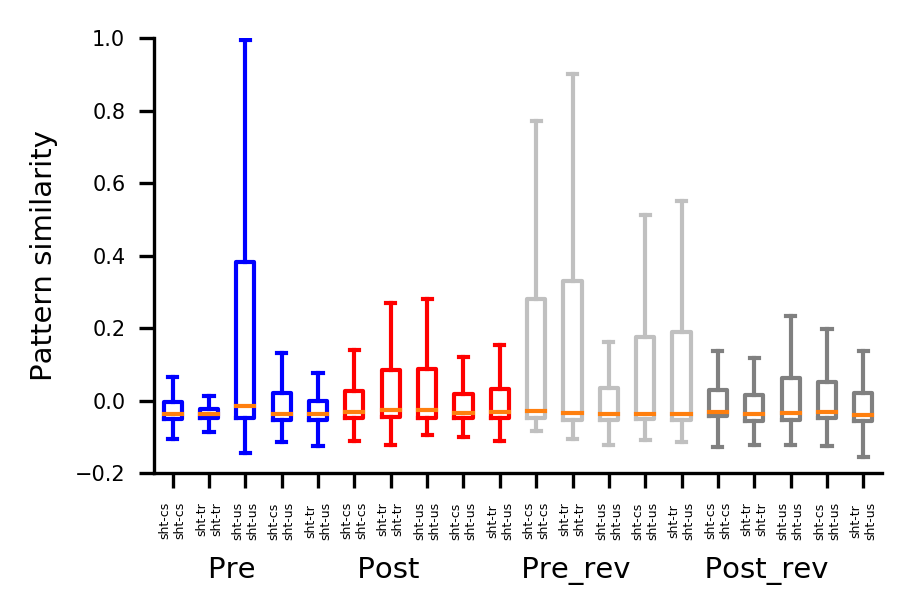

In [40]:
from scipy import stats

pairs_to_plot = pairs_to_plot = [('3odor_pre-sht-cs', '3odor_pre-sht-cs'),
                 ('3odor_pre-sht-tr', '3odor_pre-sht-tr'),
                 ('3odor_pre-sht-us', '3odor_pre-sht-us'),
                 ('3odor_pre-sht-cs', '3odor_pre-sht-us'),
                 ('3odor_pre-sht-tr', '3odor_pre-sht-us'),
                 ('3odor_post-sht-cs', '3odor_post-sht-cs'),
                 ('3odor_post-sht-tr', '3odor_post-sht-tr'),
                 ('3odor_post-sht-us', '3odor_post-sht-us'),
                 ('3odor_post-sht-cs', '3odor_post-sht-us'),
                 ('3odor_post-sht-tr', '3odor_post-sht-us'),
                 ('3odor_pre_rev-sht-cs', '3odor_pre_rev-sht-cs'),
                 ('3odor_pre_rev-sht-tr', '3odor_pre_rev-sht-tr'),
                 ('3odor_pre_rev-sht-us', '3odor_pre_rev-sht-us'),
                 ('3odor_pre_rev-sht-cs', '3odor_pre_rev-sht-us'),
                 ('3odor_pre_rev-sht-tr', '3odor_pre_rev-sht-us'),
                 ('3odor_post_rev-sht-cs', '3odor_post_rev-sht-cs'),
                 ('3odor_post_rev-sht-tr', '3odor_post_rev-sht-tr'),
                 ('3odor_post_rev-sht-us', '3odor_post_rev-sht-us'),
                 ('3odor_post_rev-sht-cs', '3odor_post_rev-sht-us'),
                 ('3odor_post_rev-sht-tr', '3odor_post_rev-sht-us'),
                
                                ]
fig, ax = pl.subplots(1, 1, figsize=(3, 2))
values = [corrmat_distr[tuple(p)]
          for p in pairs_to_plot]
colors = np.repeat(['b', 'r', 'silver', 'grey',], len(values)/4).tolist()
bp = ax.boxplot(values, showfliers=False, positions=range(len(values)))
[b.set_color(c) for b, c in zip(bp['boxes'], colors)]
[b.set_color(c) for b, c in zip(bp['whiskers'], np.repeat(colors, 2))]
[b.set_color(c) for b, c in zip(bp['caps'], np.repeat(colors, 2))]


ax.set_xticks(range(len(values)))
ax.set_xticklabels(['%s\n%s'%(p[0][p[0].find('-')+1:], p[1][p[1].find('-')+1:]) for p in pairs_to_plot], fontsize=3, rotation=90)
ax.set_xlabel('Pre           Post           Pre_rev        Post_rev', fontsize=7)
ax.set_ylim(-0.2, 1)
ax.set_ylabel("Pattern similarity")
pt.nicer_plot(ax)

fig.tight_layout()
# pl.savefig("pattern_similarity_prepost_odors_violin.jpg", format="jpg", bbox_inches="tight")

In [37]:
save_workspace(db)

Could not store variable 'di'. Skipping...
Could not store variable 'stats'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'os'. Skipping...
Could not store variable 'IPython'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'np'. Skipping...
Could not store variable 'sys'. Skipping...
